#Compare Heuristic

Demonstrate a metaheuristic which performs better on one probability distribution of
knapsack problem do better than another heuristic and vice versa. 

#### 4 problem generator functions 

In [15]:
from random import randint
numberOfItems = 100
maxWeight = 10
maxValue = maxWeight # we assume the maxWeight and maxValue are the same.
max_capacity = 250

#weight and value are uniformly distributed for all items
def generateProblemUniformRandom():
    #the weight and values are uniformly distributed
    problem = [[x, randint(1,maxWeight), randint(1,maxValue)] for x in range(numberOfItems)]
    return problem
#weight and value are equal for a given item
def generateProblemWeightEqualsValue():
    #the weight and values are equal
    problem = []
    for x in range(numberOfItems):
        itemWeightValue = randint(1, maxWeight)
        problem.append([x, itemWeightValue, itemWeightValue])
    return problem
#weight+value is constant for a given item
def generateProblemWeightPlusValueConstant():
    problem = []
    for x in range(numberOfItems):
        itemValue = randint(1, maxWeight)
        problem.append([x, itemValue, maxWeight-itemValue])
    return problem
#weight>value items
def generateProblemWeightLessThanValue():
    problem = []
    for x in range(numberOfItems):
        itemValue = randint(1, maxValue)
        itemWeight = randint(1, itemValue) # the weight is less than the value
        problem.append([x, itemValue, itemWeight])
    return problem

In [16]:
#generate training data
import pandas as pd
problem = generateProblemUniformRandom()
df = pd.DataFrame(problem, columns=['index', 'value', 'weight'])
df.head()

,index,value,weight
0,0,4,8
1,1,10,4
2,2,4,10
3,3,7,3
4,4,4,8


##Multiple Restarts Hill-Climbing with all 0 start

In [17]:
import numpy as np
#function to generate a binary representation of the items selected. 
def binrep(n,r):
    return "{0:0{1}b}".format(n, r)
#random.randint(1, 2**instance_number)
weights = np.array(df["weight"])   
values = np.array(df["value"])

In [ ]:
import random

lst_trial_resultsMRHC=[]
#numberOfItems = 100
num_trials = 20
while num_trials >0:
    lst_best_value = []
    best_value = 0
    num_inter = 1000 #how many random points we use to initially use for search
    while num_inter >0:
        max_eval = 1000
        items_selected = np.zeros(100)
        while max_eval >0:
            total_value = np.dot(values,items_selected)
            total_weight = np.dot(weights,items_selected)
            if total_weight <= max_capacity:
                if total_value > best_value:
                    best_value = total_value
                    lst_best_value.append(best_value)
            idx = random.randint(0,numberOfItems-1)
            items_selected[idx] = int(not items_selected[idx]) 
            max_eval -=1
        num_inter -=1
    lst_trial_resultsMRHC.append(max(lst_best_value))
    #print num_trials
    num_trials -=1
    

<function matplotlib.pyplot.show>

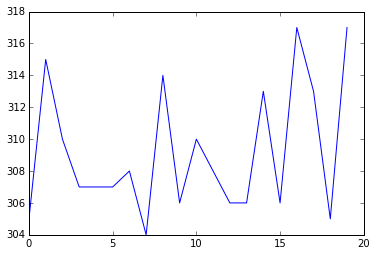

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(xrange(0,len(lst_trial_resultsMRHC))), lst_trial_resultsMRHC)
plt.show

##Genetic Algorithms (GAs)

In [ ]:
###initiate popoulation size and values
pop_size = 50
genes_selected = []
while pop_size>0:
    sample_selected = np.zeros(100)
    genes_selected.append(sample_selected)
    pop_size -= 1

In [ ]:
#evaluate population
max_weight = maxWeight
arr_total_weights = np.dot(genes_selected, weights)
arr_total_values = np.dot(genes_selected, values)
for idx in xrange(0,arr_total_values.size):
    if arr_total_weights[idx]>max_weight:
        arr_total_values[idx]=0
#print arr_total_values

In [ ]:
def tournament_selection(arr_total_values):
    #make a deep cpoy of arr_total_value
    tmp_total = copy.deepcopy(arr_total_values).tolist()
    #randomly select individual from population pool which value is not zeo
    ind1 = tmp_total.pop(random.randrange(len(tmp_total)))
    #while ind1==0:
        #ind1 = tmp_total.pop(random.randrange(len(tmp_total)))
    ind2 = tmp_total.pop(random.randrange(len(tmp_total)))
    #while ind2==0:
        #ind2 = tmp_total.pop(random.randrange(len(tmp_total)))
    #return better individual value
    if ind1>=ind2:
        return ind1
    else:
        return ind2

#print tournament_selection(arr_total_values)

In [ ]:
# function for crossover 
def crossover(mom,dad):
    cut = random.randint(0,len(mom)) 
    return np.append(mom[0:cut], dad[cut:]), np.append(dad[0:cut], mom[cut:])

In [ ]:
# function for mutation offspting
def mutate(offspring):
    idx = random.randint(0,len(offspring)-1)
    offspring[idx] = int(not offspring[idx]) 
    return offspring

In [ ]:
#evaluate offspring
#return fitness of offspring (offspring_value)
def eval_offspring(offspring):
    offspring_weight = np.dot(offspring, weights)
    offspring_value = np.dot(offspring, values)
    if offspring_weight>max_weight:
        offspring_value = 0
    return offspring_value, offspring_weight 

In [ ]:
#run genetic algorithm (GA)
import copy

num_trials = 20
lst_trial_resultsNAs=[]
while num_trials >0:
    generation = 500
    lst_best_values = []

    while generation>0:
        #select mom and dad from values population pool
        mom = tournament_selection(arr_total_values)
        dad = tournament_selection(arr_total_values)
        #select mom and dad genes that give good value fitness
        idx_mom = random.choice(np.where(arr_total_values==mom)[0])
        #print np.where(arr_total_values==mom)[0]
        mom_genes = genes_selected[idx_mom]
        idx_dad = random.choice(np.where(arr_total_values==dad)[0])
        dad_genes = genes_selected[idx_dad]
        #perform crossover
        child1, child2 = crossover(mom_genes, dad_genes)
        #mutate offsprings
        child1 = mutate(child1)
        child2 = mutate(child2)
        #evaluate offsprings
        child1_value, child1_weight = eval_offspring(child1)
        child2_value, child2_weight = eval_offspring(child2)
        #replace worst
        inds = arr_total_values.argsort()
        inds = inds[::-1]
        arr_total_values = arr_total_values[inds]
        arr_total_weights = arr_total_weights[inds]
        tmp_genes = []
        for i in inds:
            tmp_genes.append(genes_selected[i])
        genes_selected = tmp_genes
        arr_total_values = np.append(arr_total_values[0:-2],[child1_value, child2_value])
        arr_total_weights = np.append(arr_total_weights[0:-2],[child1_weight, child2_weight])
        np.append(genes_selected[0:-2],[child1, child2])
        #keep record of best value found so far
        lst_best_values.append(arr_total_values[0])
    
        generation -= 1
    #print lst_best_values[-1]
    lst_trial_resultsNAs.append(max(lst_best_values))
    #print num_trials
    num_trials -= 1
#lst_trial_results

<function matplotlib.pyplot.show>

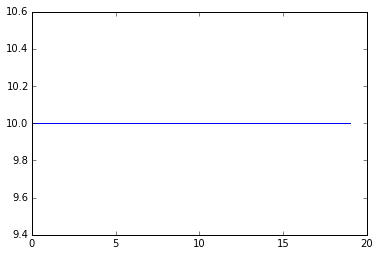

In [ ]:
#best population values found so far
%matplotlib inline
plt.plot(list(xrange(0,len(lst_trial_resultsNAs))), lst_trial_resultsNAs)
plt.show

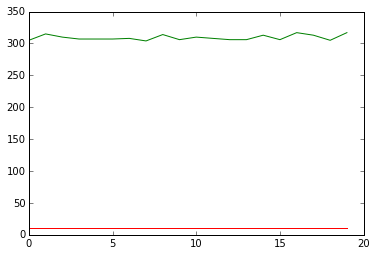

In [ ]:
plt.plot(list(xrange(0,len(lst_trial_resultsMRHC))), lst_trial_resultsMRHC, 'g-', label='MRHC')
plt.plot(list(xrange(0,len(lst_trial_resultsNAs))), lst_trial_resultsNAs, 'r-', label='NAs')
plt.show()